# Определение перспективного тарифа для телеком компании

Необходимо провести анализ тарифов для того, чтобы выяснить, какой тариф приносит больше денег. Результаты анализа в дальнейшем будут использованы компанией при корректировки рекламного бюджета.

#### Описание тарифов

*Тариф «Смарт»*
- Ежемесячная плата: 550 рублей
- Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика

Стоимость услуг сверх тарифного пакета:
- минута разговора: 3 рубля;
- сообщение: 3 рубля;
- 1 Гб интернет-трафика: 200 рублей.

*Тариф «Ультра»*
- Ежемесячная плата: 1950 рублей
- Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика

Стоимость услуг сверх тарифного пакета:
- минута разговора: 1 рубль;
- сообщение: 1 рубль;
- 1 Гб интернет-трафика: 150 рублей.

### Описание данных

calls:
- id — уникальный номер звонка;
- call_date — дата звонка;
- duration — длительность звонка в минутах;
- user_id — идентификатор пользователя, сделавшего звонок.

internet:
- id — уникальный номер сессии;
- mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах);
- session_date — дата интернет-сессии;
- user_id — идентификатор пользователя.

messages:
- id — уникальный номер сообщения;
- message_date — дата сообщения;
- user_id — идентификатор пользователя, отправившего сообщение.

tariffs:
- tariff_name — название тарифа;
- rub_monthly_fee — ежемесячная абонентская плата в рублях;
- minutes_included — количество минут разговора в месяц, включённых в абонентскую плату;
- messages_included — количество сообщений в месяц, включённых в абонентскую плату;
- mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах);
- rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата);
- rub_per_message — стоимость отправки сообщения сверх тарифного пакета;
- rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта).

users:
- user_id — уникальный идентификатор пользователя;
- first_name — имя пользователя;
- last_name — фамилия пользователя;
- age — возраст пользователя (годы);
- reg_date — дата подключения тарифа (день, месяц, год);
- churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных);
- city — город проживания пользователя;
- tariff — название тарифного плана.

### Библиотеки и модули

In [1]:
import pandas as pd

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
# %config InlineBackend.figure_format = 'svg'
from pylab import rcParams
rcParams['figure.figsize'] = 5, 5

import random as rd
import numpy as np
from scipy import stats as st

### Содержание

1. Изучение общей информации о данных
2. Подготовка данных
    - Работа с пропусками
    - Типизация данных
    - Поиск дубликатов
    - Работа с ошибками в данных
3. Выведем для каждого пользователя
    - Количество сделанных звонков и израсходованных минут разговора по месяцам
    - Количество отправленных сообщений по месяцам
    - Объем израсходованного интернет-трафика по месяцам
    - Помесячную выручку с каждого пользователя
4. Анализ полученных данных
    - Анализ средней величины параметров по каждому месяцу и тарифу
    - Анализ каждого месяца
5. Проверка гипотез
    - Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается
    - Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов
    - Анализ выручки
6. Вывод

## Изучение общей информации о данных 

In [2]:
calls = pd.read_csv('/datasets/calls.csv')
internet = pd.read_csv('/datasets/internet.csv')
messages = pd.read_csv('/datasets/messages.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')
users = pd.read_csv('/datasets/users.csv')

In [3]:
calls.head(5)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [4]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


Данные считались корректно. Пропусков в данных нет.

In [5]:
internet.head(5)

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [6]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


Данные считались корректно. Пропусков в таблице нет.

In [7]:
messages.head(5)

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [8]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


Данные считались корректно. Пропусков в таблице нет.

In [9]:
tariffs.head(5)

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [10]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


Данные считались корректно. Пропусков в таблице нет.

In [11]:
users.head(5)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [12]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


Данные считались корректно. Пропуски в таблице есть, в столбце churn_date пропущены значения, эти значения пропущены специально, давая информацию о том, что пользователь до сих пор пользуется тарифом.

## Подготовка данных

### Работа с пропусками

Пропуски присутствуют только в таблице users в столбце churn_date. Однако не понятно, каким значением заполнить эти пропуски, так как далее этот столбец будет привед к типу datetime.

### Типизация данных

P.S. С помощью типизации данных можно также оптимизировать память. В данном проекте пропущу этот этап.

*Calls*

In [13]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


- Приведем столбец call_date к типу datetime, так как он хранит в себе информацию о дате.
- Приведем столбец user_id к типу object.

In [14]:
calls['call_date'] = pd.to_datetime(calls['call_date'])
calls['user_id'] = calls['user_id'].astype('object')
print(calls['call_date'].dtypes)
print(calls['user_id'].dtypes)

datetime64[ns]
object


*Internet*

In [15]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


- Приведем столбец session_date к типу datetime, так как он хранит в себе информацию о дате.
- Приведем столбец user_id к типу object.

In [16]:
internet['session_date'] = pd.to_datetime(internet['session_date'])
internet['user_id'] = internet['user_id'].astype('object')
print(internet['session_date'].dtypes)
print(internet['user_id'].dtypes)

datetime64[ns]
object


*Messages*

In [17]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


- Приведем столбец message_date к типу datetime, так как он хранит в себе информацию о дате.
- Приведем столбец user_id к типу object.

In [18]:
messages['message_date'] = pd.to_datetime(messages['message_date'])
messages['user_id'] = messages['user_id'].astype('object')
print(messages['message_date'].dtypes)
print(messages['user_id'].dtypes)

datetime64[ns]
object


*Tariffs*

In [19]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


Изменять тип какого-либо из параметра здесь не нужно.

*Users*

In [20]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


- Приведем столбцы churn_date и reg_date к типу datetime, так как он хранит в себе информацию о дате.
- Приведем столбец user_id к типу object.

In [21]:
users['reg_date'] = pd.to_datetime(users['reg_date'])
users['churn_date'] = pd.to_datetime(users['churn_date'])
users['user_id'] = users['user_id'].astype('object')
print(users['reg_date'].dtypes)
print(users['churn_date'].dtypes)
print(users['user_id'].dtypes)

datetime64[ns]
datetime64[ns]
object


### Поиск дубликатов

In [22]:
calls.duplicated().sum()

0

In [23]:
internet.duplicated().sum()

0

In [24]:
messages.duplicated().sum()

0

In [25]:
users.duplicated().sum()

0

Дубликтов нет.

### Работа с ошибками в данных

*Calls*

In [26]:
calls.describe()

,duration
count,202607.000000
mean,6.755887
std,5.843365
min,0.000000
25%,1.300000
50%,6.000000
75%,10.700000
max,38.000000


Посомтрим на то, как устроена гистограмма и межквантильный размах duration.

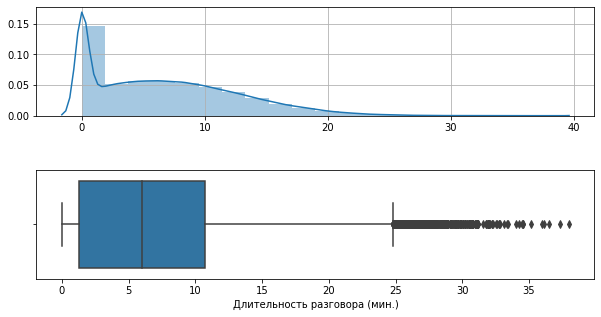

In [27]:
fig, axes = plt.subplots(nrows=2, figsize=(10, 5))
sns.distplot(calls['duration'], bins=20, ax=axes[0])
sns.boxplot(calls['duration'], orient='h', ax=axes[1])
axes[0].grid()
axes[1].set_xlabel('Длительность разговора (мин.)')
axes[0].set_xlabel('')

plt.subplots_adjust(wspace=0, hspace=0.5)
plt.show()

Видим, что в столбце duration, присутствует большое кол-во звонков, продолжительность которых равна 0. Данная ошибка в данных вероятнее всего появилась по техническим причинам. Это не связано с человеческим фактором, так как знаем, что после того, как человек взял трубку, то это уже сразу считается за минуту разговора. В таком случае значение 0 могло появится только по тех. причинам. Заменим значения с нулем на новые.

In [28]:
q1_dur = int(calls['duration'].quantile(0.25) - 1.5 * calls['duration'].median())
q3_dur = int(calls['duration'].quantile(0.75) + 1.5 * calls['duration'].median())

In [29]:
def miss_duration(duration):
    """
    Заполняю случайными значениями в диапазоне от первого квантился до третьего квантиля в сумме с медианой, у множенной на 1.5.
    """
    if duration == 0:
        rd_duration = rd.randint(0, q3_dur)
        return rd_duration
    return duration

In [30]:
calls['duration'] = calls['duration'].apply(miss_duration) # применяю функцию выше к колонке duration

Посмотрим на то, как изменилось распределение значений длительности звонка на гистограмме и межквантильном размахе.

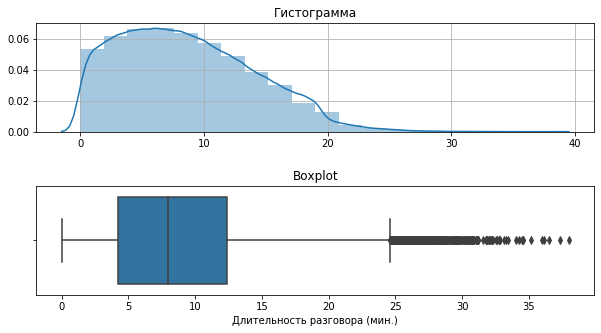

In [31]:
fig, axes = plt.subplots(nrows=2, figsize=(10, 5))
sns.distplot(calls['duration'], bins=20, ax=axes[0])
sns.boxplot(calls['duration'], orient='h', ax=axes[1])
axes[0].set_title('Гистограмма')
axes[1].set_title('Boxplot')
axes[0].grid()
axes[1].set_xlabel('Длительность разговора (мин.)')
axes[0].set_xlabel('')

plt.subplots_adjust(wspace=0, hspace=0.5)
plt.show()

Распределение приняло нормальный вид. Немного в увеличилось в целом. Видим также, что данные скошены вправо (положительно). Однако нет того, что было ранее.

*Internet*

In [32]:
internet.describe()

,Unnamed: 0,mb_used
count,149396.000000,149396.000000
mean,74697.500000,370.192426
std,43127.054745,278.300951
min,0.000000,0.000000
25%,37348.750000,138.187500
50%,74697.500000,348.015000
75%,112046.250000,559.552500
max,149395.000000,1724.830000


Посмотрим на то, как устроена гистограмма и межквантильный размах mb_used.

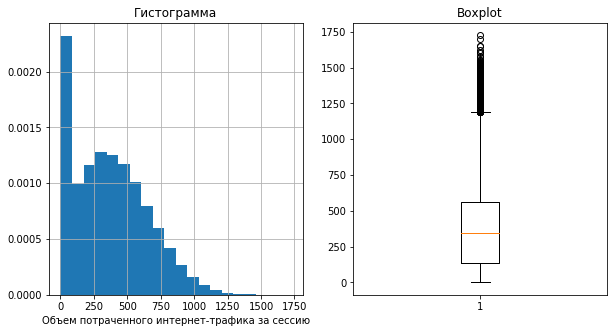

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].hist(internet['mb_used'], bins=20, density=True) # использую параметр density=True, чтобы построить диаграмму плотности,
# так как переменная непрерывная
axes[0].grid()
axes[1].boxplot(internet['mb_used'])
axes[0].set_xlabel('Объем потраченного интернет-трафика за сессию')
axes[0].set_title('Гистограмма')
axes[1].set_title('Boxplot')

plt.show()

Видим больше кол-во значений, где кол-во, использованных мегабайт равно 0. Поскольку дата интернет-сессии существует, то не может быть такого, что нисколько мегабайт потребовалось бы для этой сесии. Сделаем аналогичные манипуляции, что и выше.

In [34]:
q1_mb = int(internet['mb_used'].quantile(0.25) - 1.5 * internet['mb_used'].median())
q3_mb = int(internet['mb_used'].quantile(0.75) + 1.5 * internet['mb_used'].median())

In [35]:
def miss_mb(mb):
    """
    Заполняю случайными значениями в диапазоне от первого квантился до третьего квантиля в сумме с медианой, у множенной на 1.5.
    """
    if mb == 0:
        rd_mb = rd.randint(0, q3_mb)
        return rd_mb
    return mb

In [36]:
internet['mb_used'] = internet['mb_used'].apply(miss_mb) # применяю функцию выше к колонке mb_used

Посмотроим на то, как изменилась гистограмма и межквантильный размах.

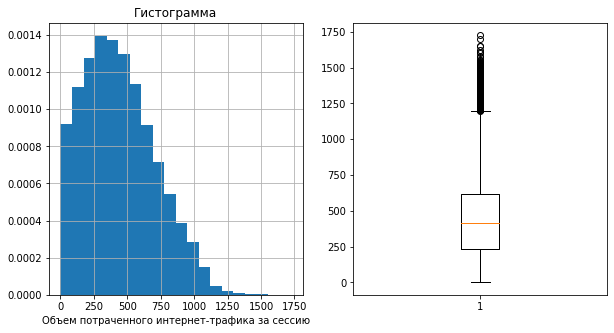

In [37]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].hist(internet['mb_used'], bins=20, density=True)
axes[0].grid()
axes[1].boxplot(internet['mb_used'])
axes[0].set_xlabel('Объем потраченного интернет-трафика за сессию')
axes[0].set_title('Гистограмма')
plt.show()

Распределение приняло нормальный вид. Небольшая скошенность данных справа.

*Messages*

In [38]:
messages.describe()

,id,message_date,user_id
count,123036,123036,123036.0
unique,123036,364,426.0
top,1165_367,2018-12-31 00:00:00,1277.0
freq,1,859,1463.0
first,NaN,2018-01-02 00:00:00,NaN
last,NaN,2018-12-31 00:00:00,NaN


*Users*

In [39]:
users.describe()

,age
count,500.00000
mean,46.58800
std,16.66763
min,18.00000
25%,32.00000
50%,46.00000
75%,62.00000
max,75.00000


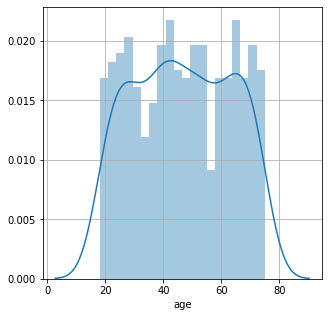

In [40]:
sns.distplot(users['age'], bins=20)
plt.grid()
plt.show()

На данной гистограмме присутствуют горбы. В целом возраст распределен равномерно. Однако есть небольшие такие группы людей, которых намного меньше, чем других.

## Выведем для каждого пользователя

### Количество сделанных звонков и израсходованных минут разговора по месяцам

In [41]:
calls['month'] = pd.DatetimeIndex(calls['call_date']).month
calls.head(5)

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,3.00,1000,7
1,1000_1,2018-08-17,19.00,1000,8
2,1000_2,2018-06-11,2.85,1000,6
3,1000_3,2018-09-21,13.80,1000,9
4,1000_4,2018-12-15,5.18,1000,12


In [42]:
calls['duration'] = calls['duration'].round()
calls.head(5)

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,3.0,1000,7
1,1000_1,2018-08-17,19.0,1000,8
2,1000_2,2018-06-11,3.0,1000,6
3,1000_3,2018-09-21,14.0,1000,9
4,1000_4,2018-12-15,5.0,1000,12


In [43]:
calls_pivot_count = calls.pivot_table(index=['user_id', 'month'], values='duration', aggfunc=['count'], fill_value=0)
calls_pivot_sum = calls.pivot_table(index=['user_id', 'month'], values='duration', aggfunc=['sum'], fill_value=0)

calls_pivot_count.reset_index(inplace=True)
calls_pivot_sum.reset_index(inplace=True)

calls_pivot_count.columns = ['user_id', 'month', 'count_calls']
calls_pivot_sum.columns = ['user_id', 'month', 'sum_calls']

user_month_data = calls_pivot_count.merge(calls_pivot_sum, on=['user_id', 'month'], how='outer')
user_month_data

,user_id,month,count_calls,sum_calls
0,1000,5,22,179
1,1000,6,43,305
2,1000,7,47,339
3,1000,8,52,546
4,1000,9,58,557
...,...,...,...,...
3169,1498,10,41,336
3170,1499,9,9,82
3171,1499,10,68,699
3172,1499,11,74,664


### Количество отправленных сообщений по месяцам

In [44]:
messages['month'] = pd.DatetimeIndex(messages['message_date']).month

In [45]:
messages_pivot = messages.pivot_table(index=['user_id', 'month'], values='id', aggfunc='count', fill_value=0)
messages_pivot.reset_index(inplace=True)
messages_pivot.columns = ['user_id', 'month', 'count_sms']

user_month_data = user_month_data.merge(messages_pivot, on=['user_id', 'month'], how='outer')
user_month_data

,user_id,month,count_calls,sum_calls,count_sms
0,1000,5,22.0,179.0,22.0
1,1000,6,43.0,305.0,60.0
2,1000,7,47.0,339.0,75.0
3,1000,8,52.0,546.0,81.0
4,1000,9,58.0,557.0,57.0
...,...,...,...,...,...
3208,1489,8,NaN,NaN,17.0
3209,1489,9,NaN,NaN,32.0
3210,1489,10,NaN,NaN,21.0
3211,1489,11,NaN,NaN,20.0


### Объем израсходованного интернет-трафика по месяцам

In [46]:
internet['month'] = pd.DatetimeIndex(internet['session_date']).month

In [47]:
internet_pivot = internet.pivot_table(index=['user_id', 'month'], values='mb_used', aggfunc='sum', fill_value=0)
internet_pivot.reset_index(inplace=True)
internet_pivot.columns = ['user_id', 'month', 'mb_used']
internet_pivot

user_month_data = user_month_data.merge(internet_pivot, on=['user_id', 'month'], how='outer')
user_month_data

,user_id,month,count_calls,sum_calls,count_sms,mb_used
0,1000,5,22.0,179.0,22.0,3214.49
1,1000,6,43.0,305.0,60.0,25107.77
2,1000,7,47.0,339.0,75.0,14881.64
3,1000,8,52.0,546.0,81.0,14874.93
4,1000,9,58.0,557.0,57.0,15949.91
...,...,...,...,...,...,...
3209,1489,9,NaN,NaN,32.0,25602.30
3210,1489,10,NaN,NaN,21.0,25860.44
3211,1489,11,NaN,NaN,20.0,24287.56
3212,1489,12,NaN,NaN,35.0,22347.51


Причины пропусков в данной таблице связаны с тем, что в какие-то месяца пользователь только пользовался одной из услуг тарифа, либо не было собранно данных об одной из услуг в какой-то месяц. Поэтому можно заменить пропущенные значения на 0.

### Помесячную выручку с каждого пользователя

Для каждого параметра (звонки, интернет, сообщения) будем искать выручку по отдельности.

In [48]:
user_tariff = users[['user_id', 'tariff']]

In [49]:
user_month_data = user_tariff.merge(user_month_data, on='user_id')
user_month_data

,user_id,tariff,month,count_calls,sum_calls,count_sms,mb_used
0,1000,ultra,5,22.0,179.0,22.0,3214.49
1,1000,ultra,6,43.0,305.0,60.0,25107.77
2,1000,ultra,7,47.0,339.0,75.0,14881.64
3,1000,ultra,8,52.0,546.0,81.0,14874.93
4,1000,ultra,9,58.0,557.0,57.0,15949.91
...,...,...,...,...,...,...,...
3209,1498,smart,10,41.0,336.0,42.0,26009.36
3210,1499,smart,9,9.0,82.0,11.0,2461.75
3211,1499,smart,10,68.0,699.0,48.0,27117.51
3212,1499,smart,11,74.0,664.0,59.0,23792.31


In [50]:
user_month_data.isnull().sum()

user_id          0
tariff           0
month            0
count_calls     40
sum_calls       40
count_sms      497
mb_used         11
dtype: int64

In [51]:
user_month_data.fillna(value=0, inplace=True)
user_month_data.isnull().sum()

user_id        0
tariff         0
month          0
count_calls    0
sum_calls      0
count_sms      0
mb_used        0
dtype: int64

In [52]:
# Записываю значения в переменные из таблицы tariffs для для упрощения читаемости кода в дальнейшем

month_price_ultra = tariffs.loc[tariffs['tariff_name'] == 'ultra']['rub_monthly_fee'].values[0]
limit_dur_calls_ultra = tariffs.loc[tariffs['tariff_name'] == 'ultra']['minutes_included'].values[0]
limit_sms_ultra = tariffs.loc[tariffs['tariff_name'] == 'ultra']['messages_included'].values[0]
limit_mb_ultra = tariffs.loc[tariffs['tariff_name'] == 'ultra']['mb_per_month_included'].values[0]
price_calls_ultra = tariffs.loc[tariffs['tariff_name'] == 'ultra']['rub_per_minute'].values[0]
price_sms_ultra = tariffs.loc[tariffs['tariff_name'] == 'ultra']['rub_per_message'].values[0]
price_gb_ultra = tariffs.loc[tariffs['tariff_name'] == 'ultra']['rub_per_gb'].values[0]

month_price_smart = tariffs.loc[tariffs['tariff_name'] == 'smart']['rub_monthly_fee'].values[0]
limit_dur_calls_smart = tariffs.loc[tariffs['tariff_name'] == 'smart']['minutes_included'].values[0]
limit_sms_smart = tariffs.loc[tariffs['tariff_name'] == 'smart']['messages_included'].values[0]
limit_mb_smart = tariffs.loc[tariffs['tariff_name'] == 'smart']['mb_per_month_included'].values[0]
price_calls_smart = tariffs.loc[tariffs['tariff_name'] == 'smart']['rub_per_minute'].values[0]
price_sms_smart = tariffs.loc[tariffs['tariff_name'] == 'smart']['rub_per_message'].values[0]
price_gb_smart = tariffs.loc[tariffs['tariff_name'] == 'smart']['rub_per_gb'].values[0]

In [53]:
def month_revenue(row):
    """
    Функция, которая проходится по каждой строчке в сводной таблице. Определяем тариф. В зависимости от него будет зависеть то,
    какой расчет доп. оплаты будет. Одновременно с этим считаем выручку за месяц данного пользователя по данному тарифу.
    """
    month_revenue = 0
    extra_pay = 0
    user_dur_calls = np.ceil(row['sum_calls'])
    user_sms = row['count_sms']
    user_mb_used = np.ceil(row['mb_used'])
    if row['tariff'] == 'ultra':
        month_revenue += month_price_ultra
        if user_dur_calls > limit_dur_calls_ultra:
            extra_pay += (user_dur_calls - limit_dur_calls_ultra) * price_calls_ultra
        if user_sms > limit_sms_ultra:
            extra_pay += (user_sms - limit_sms_ultra) * price_sms_ultra
        if user_mb_used > limit_mb_ultra:
            extra_pay += (np.ceil(user_mb_used / 1024) - limit_mb_ultra / 1024) * price_gb_ultra
        month_revenue += extra_pay
    else:
        month_revenue += month_price_smart
        if user_dur_calls > limit_dur_calls_smart:
            extra_pay += (user_dur_calls - limit_dur_calls_smart) * price_calls_smart
        if user_sms > limit_sms_smart:
            extra_pay += (user_sms - limit_sms_smart) * price_sms_smart
        if user_mb_used > limit_mb_smart:
            extra_pay += (np.ceil(user_mb_used / 1024) - limit_mb_smart / 1024) * price_gb_smart
        month_revenue += extra_pay
    return month_revenue

In [54]:
user_month_data['month_revenue'] = user_month_data.apply(month_revenue, axis=1)
user_month_data

,user_id,tariff,month,count_calls,sum_calls,count_sms,mb_used,month_revenue
0,1000,ultra,5,22.0,179.0,22.0,3214.49,1950.0
1,1000,ultra,6,43.0,305.0,60.0,25107.77,1950.0
2,1000,ultra,7,47.0,339.0,75.0,14881.64,1950.0
3,1000,ultra,8,52.0,546.0,81.0,14874.93,1950.0
4,1000,ultra,9,58.0,557.0,57.0,15949.91,1950.0
...,...,...,...,...,...,...,...,...
3209,1498,smart,10,41.0,336.0,42.0,26009.36,2750.0
3210,1499,smart,9,9.0,82.0,11.0,2461.75,550.0
3211,1499,smart,10,68.0,699.0,48.0,27117.51,3547.0
3212,1499,smart,11,74.0,664.0,59.0,23792.31,2869.0


## Анализ полученных данных

### Анализ средней величины параметров по каждому месяцу и тарифу

In [55]:
tariff_month_data_mean = user_month_data.pivot_table(index='month', columns='tariff', values=['sum_calls', 'count_sms', 'mb_used'], aggfunc='mean')
tariff_month_data_mean

count_sms                  mb_used                 sum_calls  \
tariff      smart      ultra         smart         ultra       smart   
month                                                                  
1       18.235294  33.777778  10858.364706  13809.681111  245.205882   
2       24.086207  21.958333  14706.209483  12534.979167  355.500000   
3       31.857143  32.297297  19068.275974  18386.901622  472.000000   
4       30.741071  31.563636  17097.091339  17583.116182  440.928571   
5       33.773050  37.850746  20019.794255  20429.481343  470.709220   
6       33.402439  41.726190  19986.751646  19811.951190  477.140244   
7       33.751244  49.846154  19968.394129  21468.742088  487.800995   
8       33.638298  48.439252  20897.979660  20564.194860  511.740426   
9       33.638462  52.286957  20694.636500  20168.677130  514.280769   
10      33.765306  58.430894  21302.503844  20944.280407  520.513605   
11      34.075949  55.791045  21435.218797  20798.834851  526.822785   
12      35.994065  60.611511  23009.748101  22940.381223  574.881306   

                    
tariff       ultra  
month               
1       519.222222  
2       355.000000  
3       586.405405  
4       546.836364  
5       622.850746  
6       575.821429  
7       655.901099  
8       614.710280  
9       642.947826  
10      662.926829  
11      651.462687  
12      713.446043

In [56]:
tariff_month_data_mean.reset_index(inplace=True)

In [57]:
tariff_month_data_mean.columns = ['month', 'sms_smart', 'sms_ultra', 'mg_smart', 'mg_ultra', 'calls_smart', 'calls_ultra']
tariff_month_data_mean

,month,sms_smart,sms_ultra,mg_smart,mg_ultra,calls_smart,calls_ultra
0,1,18.235294,33.777778,10858.364706,13809.681111,245.205882,519.222222
1,2,24.086207,21.958333,14706.209483,12534.979167,355.500000,355.000000
2,3,31.857143,32.297297,19068.275974,18386.901622,472.000000,586.405405
3,4,30.741071,31.563636,17097.091339,17583.116182,440.928571,546.836364
4,5,33.773050,37.850746,20019.794255,20429.481343,470.709220,622.850746
5,6,33.402439,41.726190,19986.751646,19811.951190,477.140244,575.821429
6,7,33.751244,49.846154,19968.394129,21468.742088,487.800995,655.901099
7,8,33.638298,48.439252,20897.979660,20564.194860,511.740426,614.710280
8,9,33.638462,52.286957,20694.636500,20168.677130,514.280769,642.947826
9,10,33.765306,58.430894,21302.503844,20944.280407,520.513605,662.926829


Получаем таблицу, в которой для каждого месяца посчитано то, сколько в среднем люди пишут сообщений, говорят по телефону минут, используют мегабайт интернета по каждому тарифу.

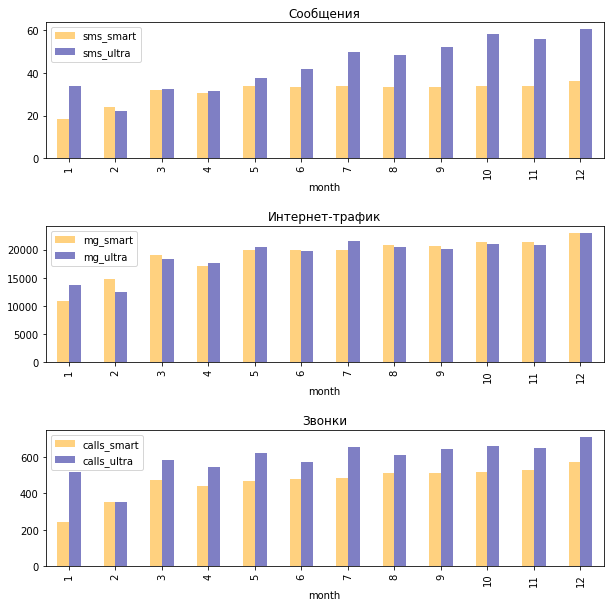

In [58]:
columns = [['sms_smart',
 'sms_ultra'],
 ['mg_smart',
 'mg_ultra'],
 ['calls_smart',
 'calls_ultra']]
titles = ['Сообщения', 'Интернет-трафик', 'Звонки']

fig, ax = plt.subplots(3, 1, figsize=(10, 10))
for i in range(3):
    tariff_month_data_mean.plot(x='month', y=columns[i], ax=ax[i], alpha=0.5, kind='bar', color=['orange', 'darkblue'])
    ax[i].set_title(titles[i])
plt.subplots_adjust(wspace=0, hspace=0.5)
plt.show()

Сообщения: пользователи тарифа Смарт в среднем отправляют одно и тоже количество сообщений каждый месяц (плюс-минус 30) в то время, как у пользователей тарифа Ультра это число умеренно растет, так в декабре оно было равно - около в 20, когда в январе уже столо равно примерно 60. Больше всего сообщений высылают пользователи тарифа Ультра.

Интернет-трафик: первые два месяца в среднем было использовано меньше всего мегабайтов интернет-трафика у того и другого тарифа. Однако затем объем использования трафика возрастает. В целом у обоих тарифово это число держится на одном уровне каждый месяц, не намного Ультра превышает Смарт.

Звонки: в среднем длительность разговора по телефону у пользователей тарифа Ультра сильно выше, чем у тех, кто использует Смарт (примерно на 100 минут). В целом уровень у того, и друго тарифа держится на одном уровне. Смарт - 400-500 минут, а Ультра - 500-600 минут.

### Анализ каждого месяца

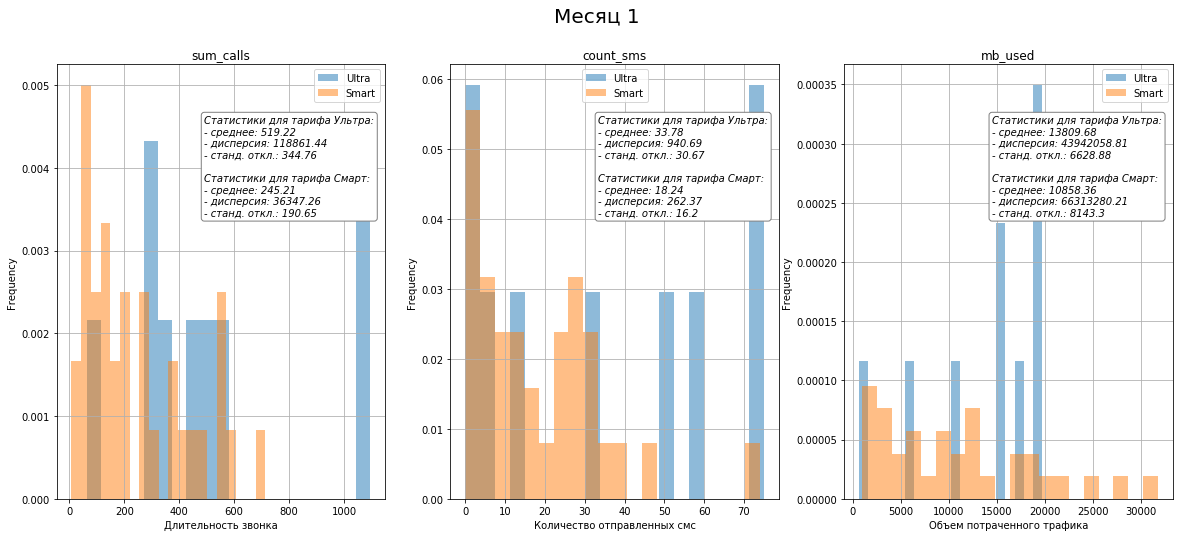

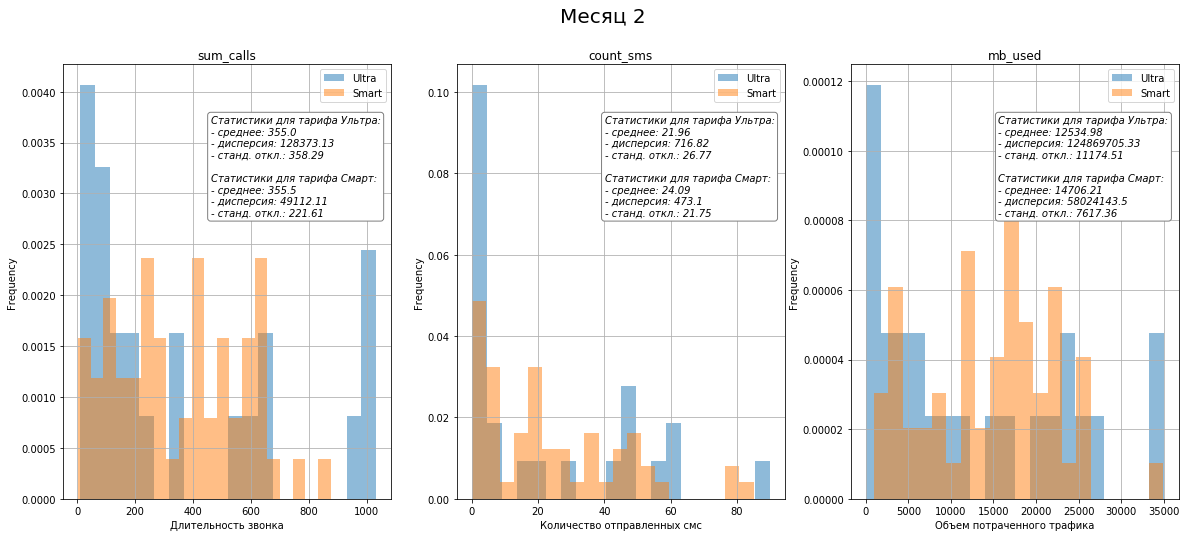

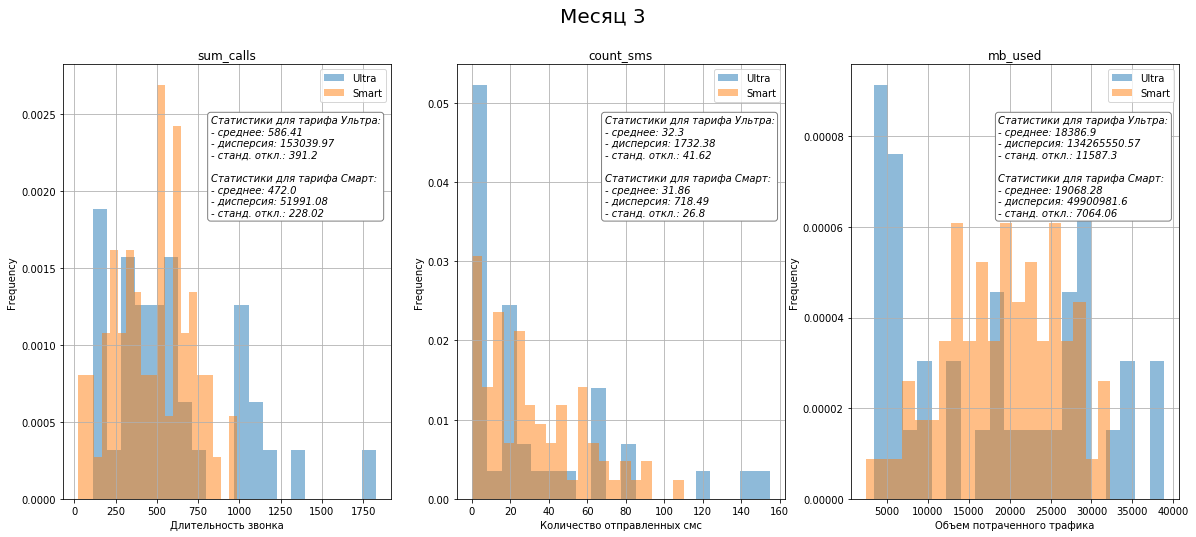

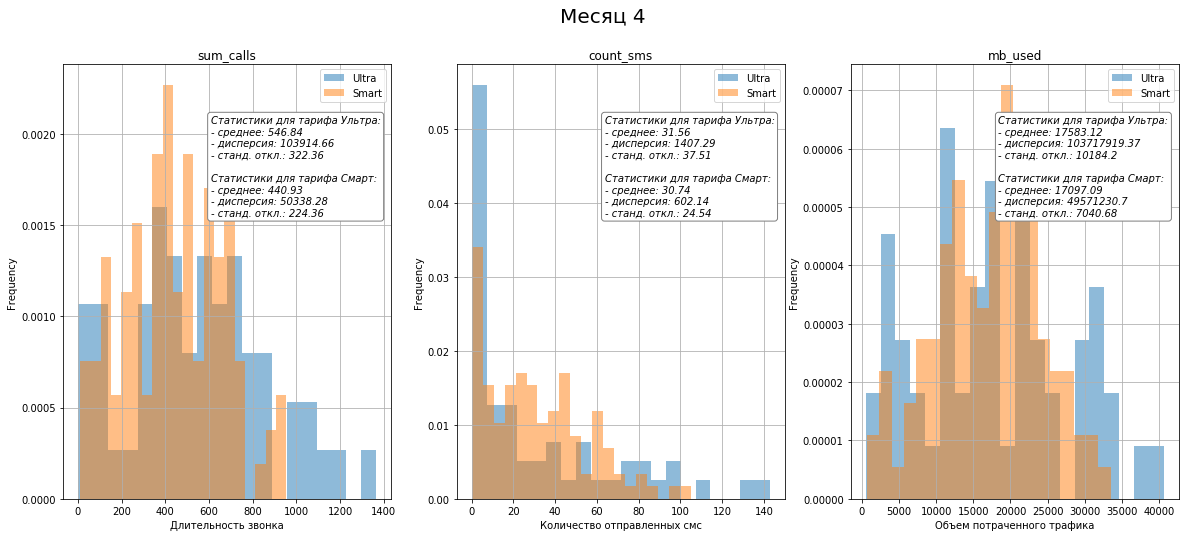

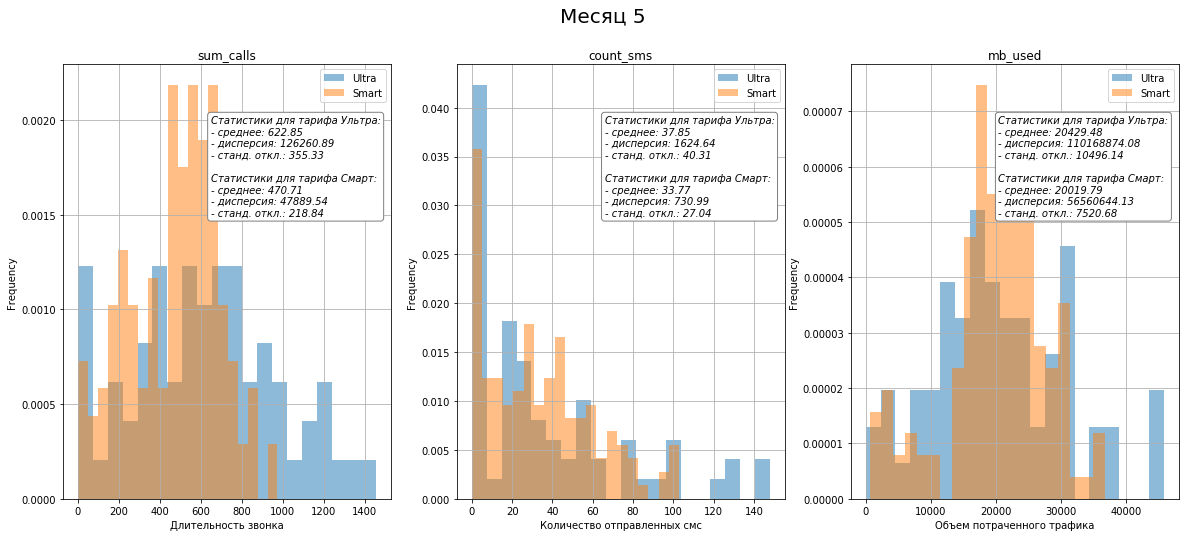

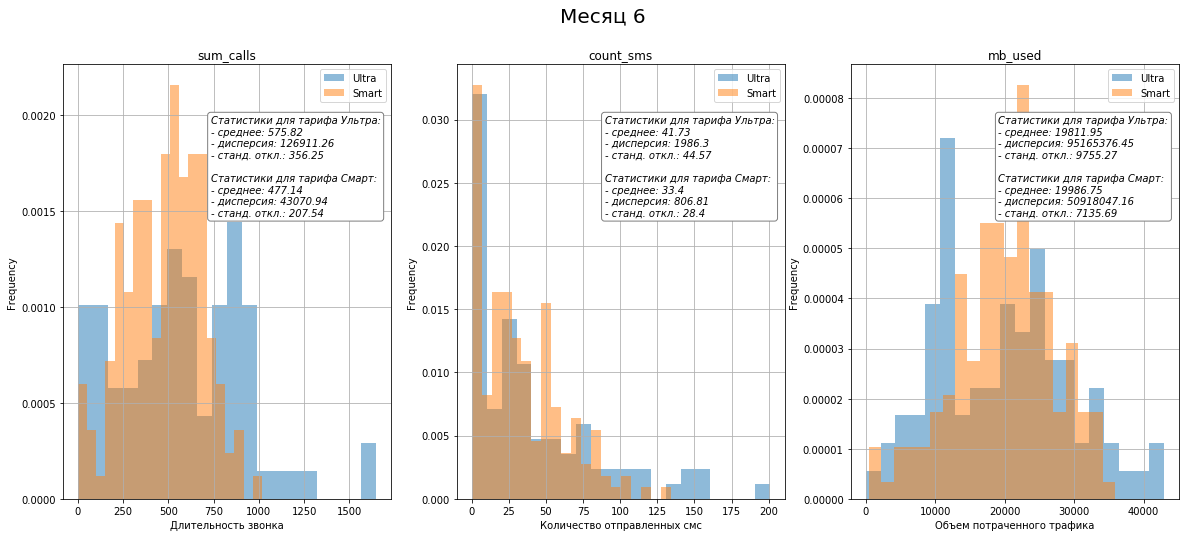

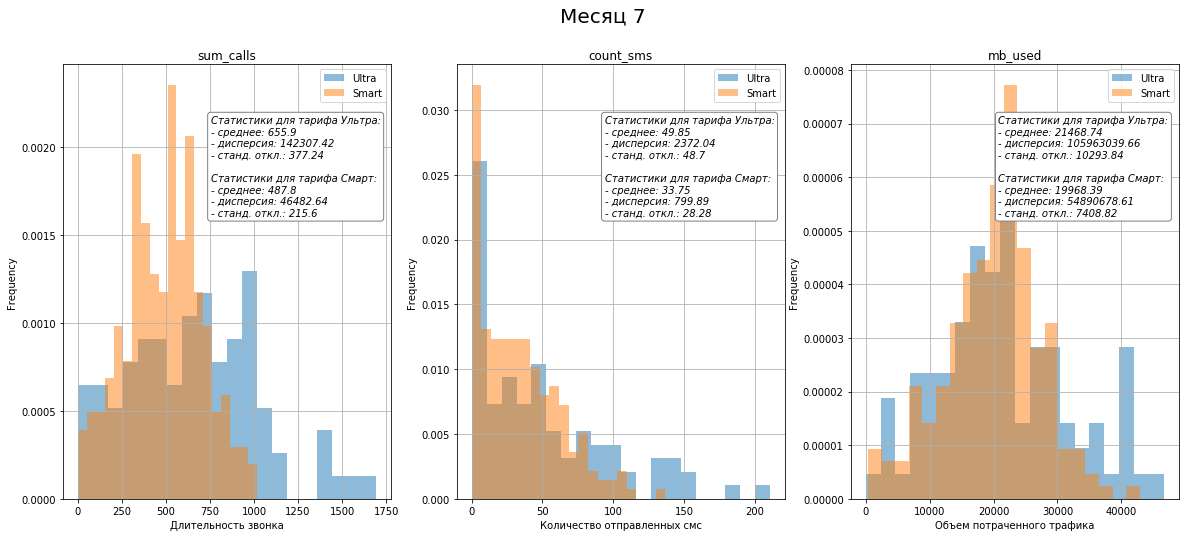

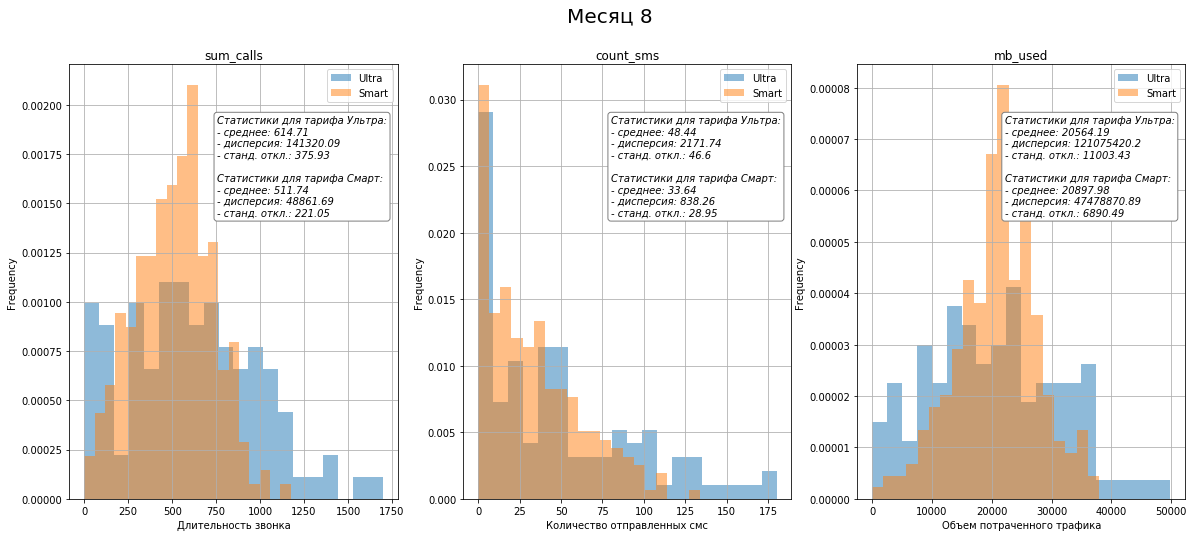

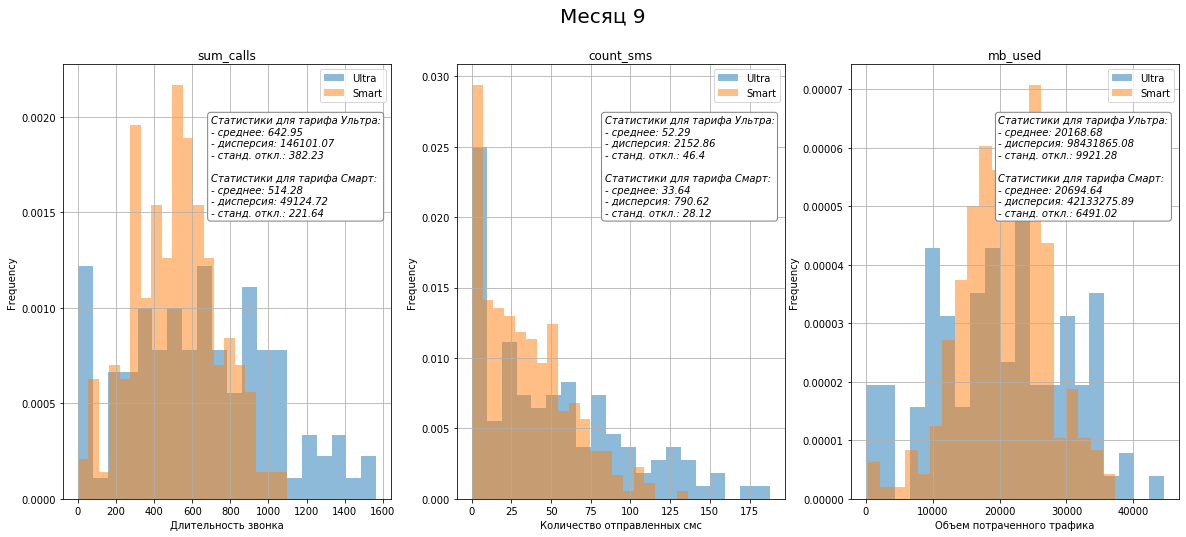

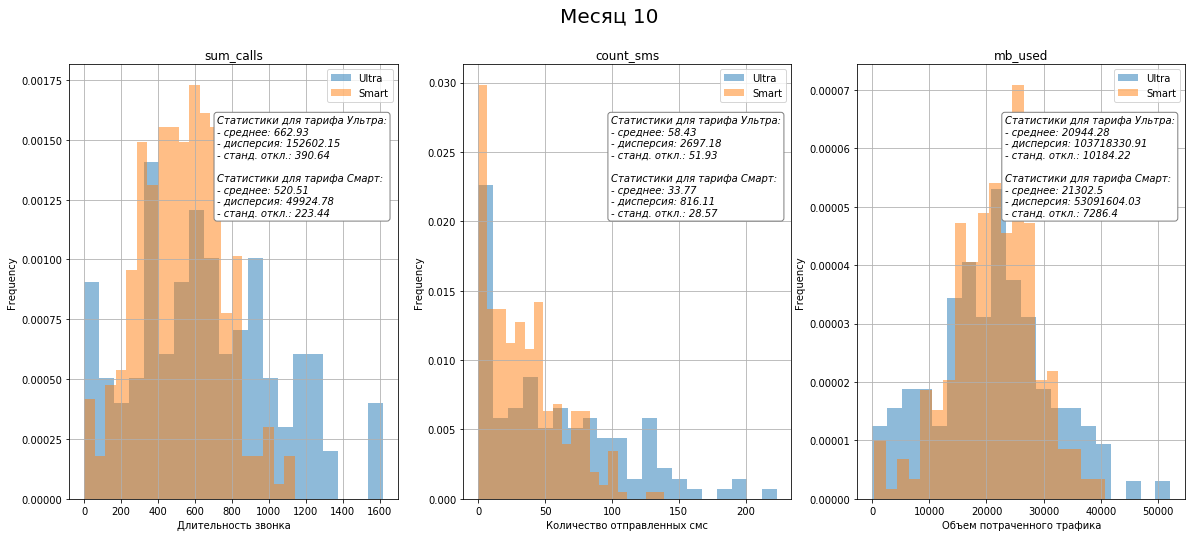

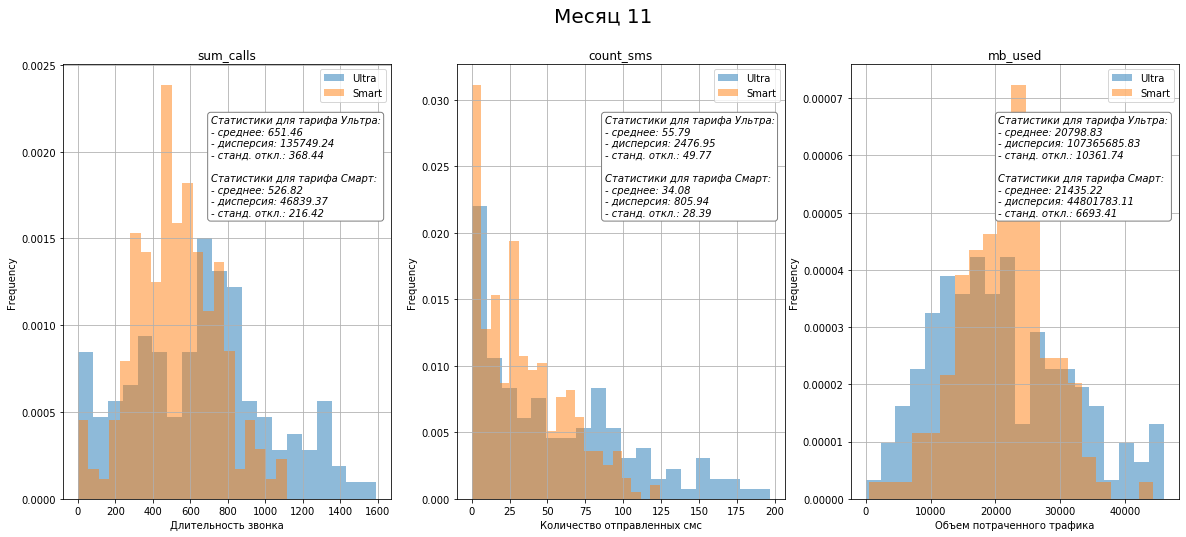

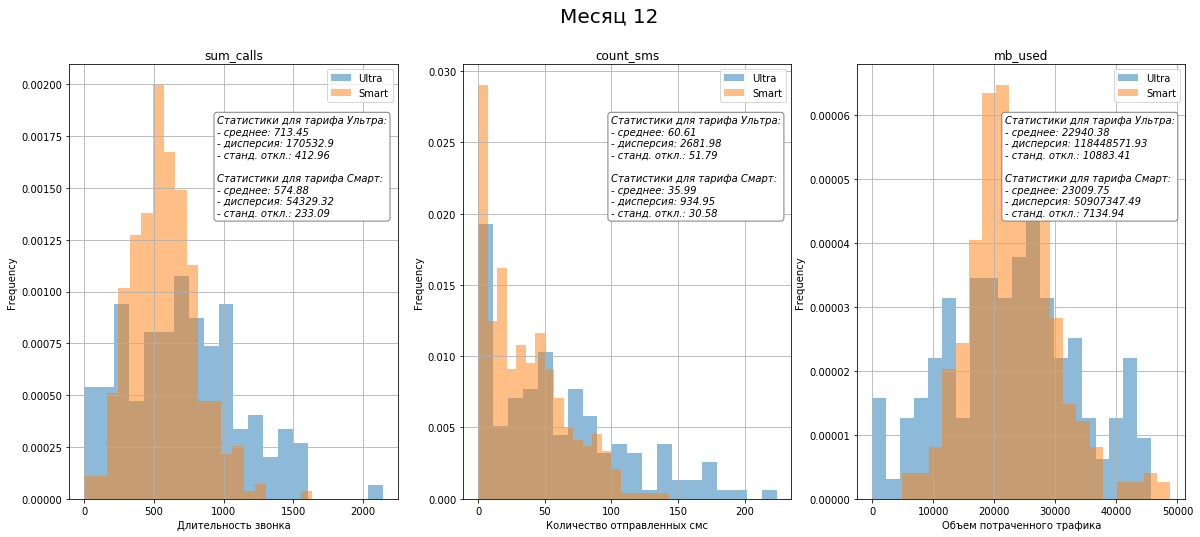

In [59]:
months = sorted(user_month_data['month'].unique().tolist())
parametrs = ['sum_calls', 'count_sms', 'mb_used']
xlabels = ['Длительность звонка', 'Количество отправленных смс', 'Объем потраченного трафика']
text_statistic = 'Характеристики для тарифа Ультра:\n- среднее: {mean_ultra}\n- дисперсия: {var_ultra}\n- станд. откл.: {std_ultra}\n'
bbox = {'facecolor':'white',
       'edgecolor': 'grey',
       'boxstyle': 'round'}

for month in months:
    fig, ax = plt.subplots(1, 3, figsize=(20, 8))
    fig.suptitle(f'Месяц {month}', fontsize=20)
    for parametr in range(len(parametrs)):
        user_month_data.query('month == @month and tariff == "ultra"')[parametrs[parametr]].plot(kind='hist', bins=20, ax=ax[parametr], alpha=0.5, label='Ultra', density=True)
        mean_ultra = np.round(user_month_data.query('month == @month and tariff == "ultra"')[parametrs[parametr]].mean(), 2)
        var_ultra = np.round(np.var(user_month_data.query('month == @month and tariff == "ultra"')[parametrs[parametr]], ddof=1), 2)
        std_ultra = np.round(np.std(user_month_data.query('month == @month and tariff == "ultra"')[parametrs[parametr]], ddof=1), 2)
        user_month_data.query('month == @month and tariff == "smart"')[parametrs[parametr]].plot(kind='hist', bins=20, ax=ax[parametr], alpha=0.5, label='Smart', density=True)
        mean_smart = np.round(user_month_data.query('month == @month and tariff == "smart"')[parametrs[parametr]].mean(), 2)
        var_smart = np.round(np.var(user_month_data.query('month == @month and tariff == "smart"')[parametrs[parametr]], ddof=1), 2)
        std_smart = np.round(np.std(user_month_data.query('month == @month and tariff == "smart"')[parametrs[parametr]], ddof=1), 2)
        ax[parametr].set_title(parametrs[parametr])
        ax[parametr].set_xlabel(xlabels[parametr])
        ax[parametr].legend()
        ax[parametr].grid()
        ax[parametr].text(0.45, 0.65, f'Статистики для тарифа Ультра:\n- среднее: {mean_ultra}\n- дисперсия: {var_ultra}\n- станд. откл.: {std_ultra}\n\nСтатистики для тарифа Смарт:\n- среднее: {mean_smart}\n- дисперсия: {var_smart}\n- станд. откл.: {std_smart}',
                          bbox=bbox, transform=ax[parametr].transAxes, style='italic')
    plt.show()

## Проверка гипотез

Заранее зададим уровень значимость, равный 5%.

In [60]:
alpha = .05

### Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается

Данная гипотеза относится к гипотезе о равенстве средних двух генеральных совокупностей.

In [61]:
user_mean_revenue = user_month_data.groupby('user_id').agg({'month_revenue': 'mean'})
user_mean_revenue.reset_index(inplace=True)
user_mean_revenue.columns = ['user_id', 'mean_revenue']
user_mean_revenue = user_mean_revenue.merge(users[['user_id', 'tariff']], on='user_id', how='left')
user_mean_revenue

,user_id,mean_revenue,tariff
0,1000,1950.000000,ultra
1,1001,1880.500000,smart
2,1002,1978.571429,smart
3,1003,1950.000000,ultra
4,1004,1950.000000,ultra
...,...,...,...
493,1495,2400.000000,ultra
494,1496,3903.083333,smart
495,1497,1470.666667,smart
496,1498,2859.000000,smart


In [62]:
revenue_smart = user_mean_revenue.loc[user_month_data['tariff'] == 'smart']['mean_revenue']
revenue_ultra = user_mean_revenue.loc[user_month_data['tariff'] == 'ultra']['mean_revenue']

In [63]:
month_revenue_ultra = user_month_data.loc[user_month_data['tariff'] == 'ultra']['month_revenue']
month_revenue_smart = user_month_data.loc[user_month_data['tariff'] == 'smart']['month_revenue']

In [64]:
print(month_revenue_ultra.head(5))
print(month_revenue_smart.head(5))

0    1950.0
1    1950.0
2    1950.0
3    1950.0
4    1950.0
Name: month_revenue, dtype: float64
8     2458.0
9     1303.0
10     550.0
11    2550.0
12    2550.0
Name: month_revenue, dtype: float64


In [65]:
result = st.ttest_ind(revenue_smart, revenue_ultra)
print(f'p-value: {result.pvalue}')
if result.pvalue > alpha:
     print('Отвергаем гипотезу')
else:
    print('Не отвергаем гипотезу')

p-value: 0.8955993687479932
Отвергаем гипотезу


Отсюда можно сделать вывод, что средняя выручка пользователей тарифов близка друг к другу.

Гипотеза H0: средняя выручка пользователей тарифов Смарт и Ультра равны  
Альтернативная гипотеза H1: -//- не равны

In [66]:
result = st.ttest_ind(month_revenue_ultra, month_revenue_smart)
print(f'p-value: {result.pvalue}')
if result.pvalue >= alpha:
    print('Не отвергаем гипотезу')
else:
    print('Отвергаем гипотезу')

p-value: 0.3026988023443713
Не отвергаем гипотезу


### Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

Данная гипотеза относится к гипотезе о равенстве средних двух генеральных совокупностей.

In [67]:
user_mean_revenue_city = user_mean_revenue.merge(users[['user_id', 'city']], on='user_id', how='left')
user_mean_revenue_city

,user_id,mean_revenue,tariff,city
0,1000,1950.000000,ultra,Краснодар
1,1001,1880.500000,smart,Москва
2,1002,1978.571429,smart,Стерлитамак
3,1003,1950.000000,ultra,Москва
4,1004,1950.000000,ultra,Новокузнецк
...,...,...,...,...
493,1495,2400.000000,ultra,Иркутск
494,1496,3903.083333,smart,Вологда
495,1497,1470.666667,smart,Челябинск
496,1498,2859.000000,smart,Владикавказ


In [68]:
revenue_moscow = user_mean_revenue_city.query('city == "Москва"')['mean_revenue']
revenue_not_msk = user_mean_revenue_city.query('city != "Москва"')['mean_revenue']

In [69]:
result = st.ttest_ind(revenue_moscow, revenue_not_msk)
print(f'p-value: {result.pvalue}')
if result.pvalue > alpha:
     print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

p-value: 0.26000010011288355
Отвергаем нулевую гипотезу


Отсюда можно сделать вывод, что средняя выручка из Москвы близка к средней выручке пользователей из других городов.

Гипотеза H0: средняя выручка пользователей в Москве и других городах равны  
Альтернативная гипотеза H1: -//- не равны

In [70]:
result = st.ttest_ind(revenue_moscow, revenue_not_msk)
print(f'p-value: {result.pvalue}')
if result.pvalue > alpha:
     print('Не отвергаем гипотезу')
else:
    print('Отвергаем нулевую гипотезу')

p-value: 0.26000010011288355
Не отвергаем гипотезу


### Анализ выручки

In [71]:
revenue_month = user_month_data.pivot_table(index='month', columns='tariff', values='month_revenue', aggfunc='sum')
revenue_month.reset_index(inplace=True)
revenue_month.columns = ['month', 'smart', 'ultra']
revenue_month

,month,smart,ultra
0,1,32707.0,17550.0
1,2,74281.0,48000.0
2,3,144909.0,76200.0
3,4,175605.0,111900.0
4,5,288462.0,141300.0
5,6,328716.0,173400.0
6,7,411925.0,195750.0
7,8,516155.0,228600.0
8,9,552039.0,237150.0
9,10,674912.0,259050.0


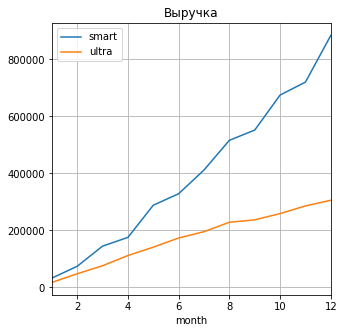

In [72]:
ax = revenue_month.plot('month', 'smart')
revenue_month.plot('month', 'ultra', ax=ax)
plt.grid()
plt.title('Выручка')
plt.show()

## Вывод

- В общих словах, как и ожидалось, пользователи тарифа Ультра больше разговаривают по телефону и отправляют сообщений. Однако по количеству использованного интерене-трафика Смарт и Ультра почти наравне.
- В среднем выручку по каждому из тарифов можно считать одинаковой из проведенного статистического анализа гипотеза.
- Также статически доказано, что гипотеза о различии выручки в Москве и других города, не верна. Выручка все же стремится к какому-то одному числу.
- Также из графика зависимости выручки от месяца видим, что выручка от тарифа Смарт стремительно растет в то время, когда темп роста графика выручки тарифа Ультра постепенно уменьшается.

В данной работе провел анализ пользователей оператора Мегалайн. Сначала была проведена работа с пропусками. Пропусков в данных, которые бы значительно влияли на работу с ними обнаружено не было. Проведена работа с приведением типов данных. В большинстве таблиц id привел в типу object, так как это порядковая переменная, которую не имеет смысла хранить в вещественном типе. Также привел столбцы, в которых хранится дата к типу datetime.

Далее построена структура таблицы с данными по каждому пользователю, которая дает общее представление о том, сколько пользователь пользовался одной из услуг тарифа. С такой структурой было удобно работать, проводя рассчет месячной выручки по каждому пользователю.

Проведена большая работа по определению статистик и распределений переменных, где для каждого месяца компания может понять, как устроено распредление значений услуг каждого тарифа. Мегалайн может это использовать для того, чтобы выбрать оптимальную стратегию при принятии решения о проведнии какой-либо из политик.

Также интересно отметить, что в среднем объем использования интернет-трафика при использовании тарифов Смарт и Ультра не отличается.

Проверены гипотезы и получены следующие выводы:  
- средняя выручка пользователей тарифов Смарт и Ультра не отличается: p-value равно 30%;
- средняя выручка пользователей из Москвы и других городов не отличается: p-value равно 26%.